# Hyperparameter optimization

Hyperparameter optimization in machine learning intends to find the hyperparameters of a given machine learning algorithm that deliver the best performance as measured on a validation set.

While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training. 


The core algorithms for hyperparameter optimization, found in the Scikit-learn package, are __grid search and random search__. Recently, the Scikit-learn contributors have also added the halving algorithm to improve the performances of both grid search and random search strategies.

Hyperparameters can have a direct impact on the training of machine learning algorithms. Thus, to achieve maximal performance, it is important to understand how to optimize them. Here we will use basic strategies for optimizing hyperparameters:

*__1. Grid search__*

*__2. Random search__*

*__3. Halving random search__*

*__4. Halving grid search__*

*__5. Comparision__*

## Import libraries

In [268]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt 
import itertools
import seaborn as sns
import scipy
from sklearn.metrics import confusion_matrix
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier
import numpy as np
warnings.filterwarnings("ignore")

Generate a random dataset for classification problem.

In [160]:
X, y = make_classification(n_samples=100, n_features=50,
                           n_informative=10,
                           n_redundant=25, n_repeated=15,
                           n_clusters_per_class=5,
                           flip_y=0.05, class_sep=0.1,
                           random_state=0)

## Grid Search


Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator.

Basically, we divide the domain of the hyperparameters into a discrete grid. Then, we try every combination of values of this grid, calculating some performance metrics using cross-validation. The point of the grid that maximizes the average value in cross-validation, is the optimal combination of values for the hyperparameters.



![alt text](https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png)



In [3]:
svc = svm.SVC()
svc = svm.SVC(probability=True, random_state=1)

search_grid = [
               {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
               {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
               'kernel': ['rbf']}
               ]
scorer = 'accuracy'

In [4]:
search_func = GridSearchCV(estimator=svc, param_grid=search_grid, scoring=scorer, n_jobs=-1, cv=5)
search_func.fit(X, y)

print(search_func.best_params_)
print(search_func.best_score_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.7


## Random Search

Random search is similar to grid search, but instead of using all the points in the grid, it tests only a randomly selected subset of these points. The smaller this subset, the faster but less accurate the optimization. The larger this dataset, the more accurate the optimization but the closer to a grid search.

Random search is a very useful option when you have several hyperparameters with a fine-grained grid of values. Using a subset made by 5-100 randomly selected points, we are able to get a reasonably good set of values of the hyperparameters. It will not likely be the best point, but it can still be a good set of values that gives us a good model.


![alt text](https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-7.png)

In [32]:
search_dict = {'kernel': ['linear', 'rbf'],
               'C': loguniform(1, 1000),'gamma': loguniform(0.0001, 0.1)
               }

In [49]:
search_func = RandomizedSearchCV(estimator=svc,
                                                 param_distributions=search_dict,
                                                 n_iter=6,
                                                 scoring=scorer,
                                                 n_jobs=-1,
                                                 cv=5
                                                 )

'RandomizedSearchCV'

In [6]:
search_func = RandomizedSearchCV(estimator=svc,
                                                 param_distributions=search_dict,
                                                 n_iter=6,
                                                 scoring=scorer,
                                                 n_jobs=-1,
                                                 cv=5
                                                 )
    
search_func.fit(X, y)

print(search_func.best_params_)
print(search_func.best_score_)

{'C': 283.5142995458433, 'gamma': 0.00011814677561970462, 'kernel': 'rbf'}
0.6966666666666667


# Halving grid search


Halving Grid Search, a new class of successive Halving, where training is performed on the subsets of data, rather than on all the data. The worst performing data are filtered out by training them on a small subset of data. After N number iterations select the best data/candidates leading to a faster evaluation time.

The search strategy starts evaluating all the candidates with a small amount of resources and iteratively selects the best candidates, using more and more resources.

In [117]:
search_func = HalvingGridSearchCV(estimator=svc, param_grid=search_grid,
                                    resource='n_samples',
                                    max_resources=100,
                                    aggressive_elimination=True,
                                    scoring=scorer,
                                    n_jobs=-1,
                                    cv=5,
                                    random_state=0)

search_func.fit(X, y)
print(search_func.best_params_)
print(search_func.best_score_)

{'C': 1000, 'kernel': 'linear'}
0.6166666666666667


# Halving random search

Halving randomized search also uses the same successive halving approach. Unlike halving grid search, it trains just randomly selected combinations of parameters on a portion of the training data.



In [7]:
search_func = HalvingRandomSearchCV(estimator=svc, param_distributions=search_dict,
                                    resource='n_samples',
                                    max_resources=100,
                                    aggressive_elimination=True,
                                    scoring=scorer,
                                    n_jobs=-1,
                                    cv=5,
                                    random_state=0)

search_func.fit(X, y)

print(search_func.best_params_)
print(search_func.best_score_)

{'C': 86.63279761354555, 'gamma': 0.002054762512591133, 'kernel': 'linear'}
0.6166666666666667


# Comparision

Here, I have written a class where we should input X, y, paramater space and metric score which hyperparamater optimization strategy should maximize.

Class has two methods:

1. show_confusion_matrix() - run all strategies and evaluate models. Then show confusion matrix for each strategy.

2. run_and_show_results() - runs all strageties and return dataframe that has following features: name, best_params,	best_score,	run_time

We can change:

1. estimator - select your favorite estimator for modeling. :)

2. p_space - if you dont mind estimator, but want to change paramater space, just define a dictionary and write down your own space. ps: if you have changed estimator, dont forget to change p_space as well. 

3. metric - Not sure about accuracy? No problem. Evaluate your strategies with roc_auc, f1_score, and etc.  

In [269]:
class CompareSearchMethods:
    
    """
    This is a class for tuning hyperparameters using search methods.
    Methods must be GridSearchCV HalvingGridSearchCV, GridSearchCV and RandomizedSearchCV.
    
    Inputs:
        X, y: dataset
        estimator: Logistic regression, SVM, KNN, etc
        p_space: parameter space
        metric_score: evaluation metric
        
    Output:
    
        Returns the metric of estimator instance
    
    """   
    def __init__(self, X, y, estimator = svm.SVC(probability=True, random_state=1), random_p_space = {}, grid_p_space = {}, metric_score = 'accuracy'):
        
        self.X = X
        self.y = y
        self.estimator = estimator
        self.random_p_space = random_p_space
        self.grid_p_space = grid_p_space
        self.metric_score = metric_score
        
    def _methods_with_parameters(self):
        
        self.grid_p = [
                   {'C': [1, 10,100], 'kernel': ['linear']},
                   {'C': [1, 10,100], 'gamma': [0.001, 0.01],'kernel': ['rbf']} ]
            
        self.random_p = {'kernel': ['linear', 'rbf'], 'C': loguniform(1, 100),'gamma': loguniform(0.01, 0.1)}
                           
        self.grid_search = GridSearchCV(estimator=self.estimator, param_grid=self.grid_p , scoring=self.metric_score, n_jobs=-1, cv=5)
        self.rand_search = RandomizedSearchCV(estimator=self.estimator, param_distributions=self.random_p, n_iter=6, scoring=self.metric_score, n_jobs=-1, cv=5)
        self.halving_rand_search = HalvingRandomSearchCV(estimator=self.estimator, param_distributions=self.random_p, resource='n_samples', max_resources=100, aggressive_elimination=True, scoring=self.metric_score, n_jobs=-1, cv=5, random_state=0)
        self.halving_grid_search = HalvingGridSearchCV(estimator=self.estimator, param_grid=self.grid_p, resource='n_samples', max_resources=100, aggressive_elimination=True, scoring=self.metric_score,n_jobs=-1,cv=5,random_state=0)
        
        return [self.grid_search, self.rand_search, self.halving_rand_search, self.halving_grid_search]

    
    def _model_fit(self, X, y, method):
        tic = time()
        
        method.fit(X, y)
        name = str(method).split('(')[0]
        best_params = method.best_params_
        best_score = method.best_score_
        run_time = time() - tic
        
        func_result = {'name':name, 'best_params': method.best_params_, 'best_score':method.best_score_, 'run_time':run_time}
        self.cfmatrixes = confusion_matrix(y_true=y, y_pred=method.predict(X))        
        return func_result
        
    def _search_funct_fit_evaluate(self):
        
        
        self.conf_matrix_list = []
        self.search_functions_results = []
        self.search_methods = self._methods_with_parameters()
        
        if len(self.grid_p_space)==0:
            
            for method in tqdm(self.search_methods):
                self.search_functions_results.append(self._model_fit(self.X, self.y, method))
                self.conf_matrix_list.append(self.cfmatrixes)
            
            return self.search_functions_results
        
        else:
            
            for method in tqdm(self.search_methods):
                method.param_grid = self.grid_p_space
                method.param_distributions = self.random_p_space
                self.search_functions_results.append(self._model_fit(self.X, self.y, method))
                self.conf_matrix_list.append(self.cfmatrixes)
            return self.search_functions_results
    
            
    def show_confusion_matrix(self):
        for i, k in zip(self.conf_matrix_list, self.search_methods):
            
            ax = sns.heatmap(i, annot=True, cmap='Blues')

            ax.set_title(str(k).split('(')[0]);
            ax.set_xlabel('\nPredicted Values')
            ax.set_ylabel('Actual Values ');

            ax.xaxis.set_ticklabels(['False','True'])
            ax.yaxis.set_ticklabels(['False','True'])

            plt.show()
            
    def run_and_show_results(self):
        
        self.search_functions_results = self._search_funct_fit_evaluate()
        result_df = pd.DataFrame(self.search_functions_results).sort_values('best_score', ascending = False)
        return result_df

In [270]:
comparing = CompareSearchMethods(X,y)

In [271]:
result_df = comparing.run_and_show_results()

100%|█████████████████████████████████████████████| 4/4 [00:09<00:00,  2.45s/it]


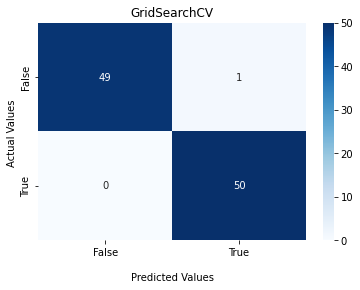

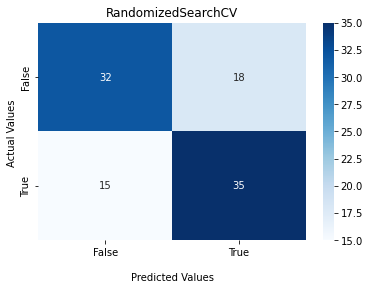

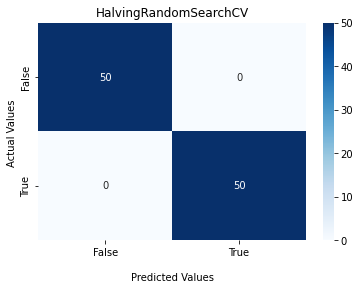

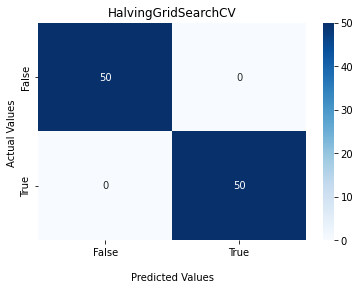

In [272]:
comparing.show_confusion_matrix()

### Custom search parameter dictionary

We can change search parameter dictionary.

In [135]:
random_search_dict = {'kernel': ['linear', 'rbf'],
               'C': loguniform(1, 100),'gamma': loguniform(0.001, 0.01)
               }

search_grid = [
               {'C': [1, 10], 'kernel': ['linear']},
               {'C': [1, 10], 'gamma': [0.01, 0.001],
               'kernel': ['rbf']}
               ]

In [136]:
comparing_with_custom_space = CompareSearchMethods(X,y, random_p_space = random_search_dict, grid_p_space = search_grid)

result_df_with_custom_space = comparing_with_custom_space.run_and_show_results()
result_df_with_custom_space

100%|█████████████████████████████████████████████| 4/4 [00:31<00:00,  7.88s/it]


,name,best_params,best_score,run_time
0,GridSearchCV,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.700000,2.716724
1,RandomizedSearchCV,"{'C': 46.34072232727819, 'gamma': 0.0133929499...",0.666667,22.461593
2,HalvingRandomSearchCV,"{'C': 19.578897201212996, 'gamma': 0.027389695...",0.616667,6.238736
3,HalvingGridSearchCV,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.694737,0.115067


### Custom metric

In [151]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

We can change metric score that stragety should maximize. It accepts all possible metrics that occurs in scklearn library.

In [162]:
comparing_with_custom_metric = CompareSearchMethods(X,y,metric_score = 'roc_auc')

comparing_with_custom_metric = comparing_with_custom_metric.run_and_show_results()
comparing_with_custom_metric

100%|█████████████████████████████████████████████| 4/4 [00:18<00:00,  4.68s/it]


,name,best_params,best_score,run_time
0,GridSearchCV,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.682000,7.371120
1,RandomizedSearchCV,"{'C': 64.96847871354835, 'gamma': 0.0121961641...",0.620000,8.891215
2,HalvingRandomSearchCV,"{'C': 19.578897201212996, 'gamma': 0.027389695...",0.542579,2.354873
3,HalvingGridSearchCV,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.617024,0.089458


### Custom estimator

Default estimator is SVM, but you can change it as well. Just be sure that you have also changed parameter spaces.

In [173]:
random_grid = {'bootstrap': [False],
 'max_depth': [10, 20,  None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1,4],
 'n_estimators': [200, 400]}

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 110],
    'max_features': [2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

comparing_with_custom_estr = CompareSearchMethods(X, y, estimator = RandomForestClassifier(), random_p_space = random_grid, grid_p_space = param_grid)

result_df_with_custom_estr  = comparing_with_custom_estr.run_and_show_results()
result_df_with_custom_estr

100%|█████████████████████████████████████████████| 4/4 [00:11<00:00,  2.80s/it]


,name,best_params,best_score,run_time
0,GridSearchCV,"{'bootstrap': True, 'max_depth': 110, 'max_fea...",0.640000,4.204950
1,RandomizedSearchCV,"{'n_estimators': 400, 'min_samples_leaf': 4, '...",0.640000,1.790703
2,HalvingRandomSearchCV,"{'n_estimators': 200, 'min_samples_leaf': 4, '...",0.633333,1.173431
3,HalvingGridSearchCV,"{'bootstrap': True, 'max_depth': 110, 'max_fea...",0.666667,4.011535


# Conclusion

I think that, among the four approaches, HalvingRandomSearchCV is very useful because it’s faster and, since it doesn’t reach the best point in the grid, it avoids overfitting and is more able to generalize. However, for small grids (i.e. less than 200 points) I suggest using HalvingGridSearchCV if the training phase is not too slow. For the general-purpose cases, the random search may increase training speed and reach a reasonably good solution for our model.

